## TASK 2 : COLOR IDENTIFICATION
### Submitted By Daniya

#### Description: 
        perfomed K means Algorithm to get clusters of colors in a given image


In [42]:
# Importing Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
%matplotlib inline

# Color Identification

#### RGB to Hex Conversion 

to convert Rgb color to hex code

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


#### Load an Image

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Applying K means to get the colors

In [40]:
def get_colors(image, number_of_colors, show_chart):
    #image resizing to help training of k means
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #Model
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        #save the file
        fig = plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        plt.savefig("chart.png")
        plt.close()
        
        #plotting
        f, axarr = plt.subplots(1,2,figsize=(16,16))
        axarr[0].imshow(image)
        chart =get_image("chart.png")
        axarr[1].imshow(chart)
    
    return rgb_colors

[array([223.89573415,  77.46424491,  20.19781946]),
 array([55.70502593, 45.91194777, 18.24376677]),
 array([16.1641203 , 16.3242662 , 10.62730119]),
 array([156.65699237, 153.46974269, 125.45152795]),
 array([85.10597648, 99.80572877, 34.4557672 ]),
 array([134.70478109, 165.20196694,  18.31696191]),
 array([140.25336205,  42.49479933,  19.28178189]),
 array([234.11298643, 174.76638431,  26.4514999 ])]

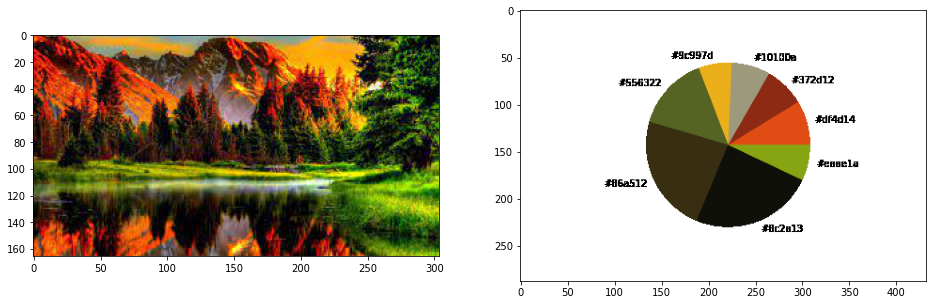

In [41]:
get_colors(get_image('test1.jfif'), 8, True)